In [ ]:

import keras
keras.__version__
from keras.layers import Embedding

# Embedding layer should take at least two arguments:
# Possible number of tokens, here 1000 (1 + maximum word index),
# Dimentionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

In [ ]:

from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split

# The Number of words considerd as features
max_features = 10000
#number of words after cut texts
maxlen = 150

#Loading the data as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

# Combining test and train data to create a dataset
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)
# Now splitting the data into train and val samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=20000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 100 samples
_, test_texts, _, test_labels = train_test_split(x_test, y_test, test_size=100, random_state=42, stratify=y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# Now we specify maximum input length to our embedding layer so taht we flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# now We flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1601      
                                                                 
Total params: 81601 (318.75 KB)
Trainable params: 81601 (318.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
625/625 [==============================] - 32s 49ms/step - loss: 0.5912 - acc: 0.7018 - val_loss: 0.4081 - val_acc: 0.8370
Epoch 2/5
625/625 [==============================] - 9s 15ms/step - loss: 0.3200 - acc: 0.8727 - val_loss: 0.3129 - val_acc: 0.8674
Epoch 3/5
625/6

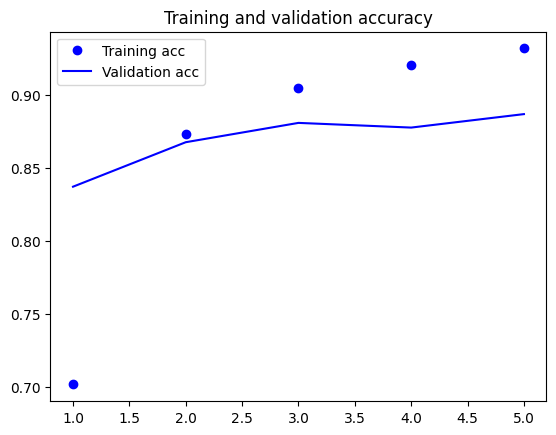

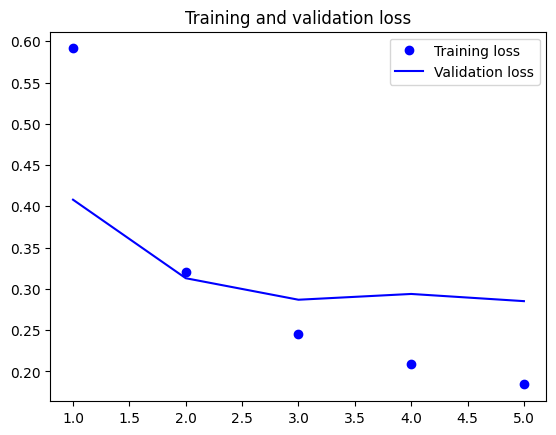

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


**Utilizing Pre-Trained Word Embeddings**

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb
!tar -xf aclImdb

!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file aclImdb: Is a directory
100   227  100   227    0     0    701      0 --:--:-- --:--:-- --:--:--   702
curl: (23) Failure writing output to destination
tar: aclImdb: Cannot read: Is a directory
tar: At beginning of tape, quitting now
tar: Error is not recoverable: exiting now


**Raw IMDB data is downloaded**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/
import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
imdb_dir = '/content/drive/MyDrive/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []


In [ ]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

maxlen = 150  # cutting the reviews after 150 words
training_samples = 100  # training only on 100 samples
validation_samples = 10000  # validation only on 10000 samples
max_words = 10000  # only the top 10,000 words in the dataset are considered


**Data Is Tokenized**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
# Splitting the data into a train set and a val set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


**Downloading the GloVe Embedding txt file**

In [ ]:
glove_dir = '/content/drive/MyDrive/'


embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # words that are not found in index embided will be indicated as all-zeros
            embedding_matrix[i] = embedding_vector


** Model is Defined**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense,Dropout,LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(128))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.add(Flatten())

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
 flatten_2 (Flatten)         (None, 1)                

** GloVe embeddings in the model is being loaded**

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

**Training and Evaluation of the Model**

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
# Model Fit
history =  model.fit(x_train, y_train,
                     epochs=5,
                     batch_size=32,
                     validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')



Epoch 1/5
4/4 [==============================] - 6s 1s/step - loss: 0.7323 - acc: 0.4500 - val_loss: 0.6904 - val_acc: 0.5474
Epoch 2/5
4/4 [==============================] - 1s 443ms/step - loss: 0.6994 - acc: 0.4900 - val_loss: 0.7152 - val_acc: 0.4988
Epoch 3/5
4/4 [==============================] - 1s 436ms/step - loss: 0.6791 - acc: 0.5700 - val_loss: 0.7049 - val_acc: 0.4988
Epoch 4/5
4/4 [==============================] - 1s 435ms/step - loss: 0.6862 - acc: 0.5100 - val_loss: 0.7256 - val_acc: 0.4988
Epoch 5/5
4/4 [==============================] - 1s 435ms/step - loss: 0.6797 - acc: 0.5900 - val_loss: 0.8051 - val_acc: 0.4988


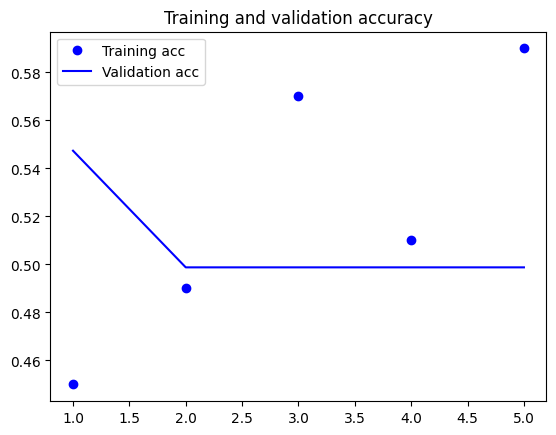

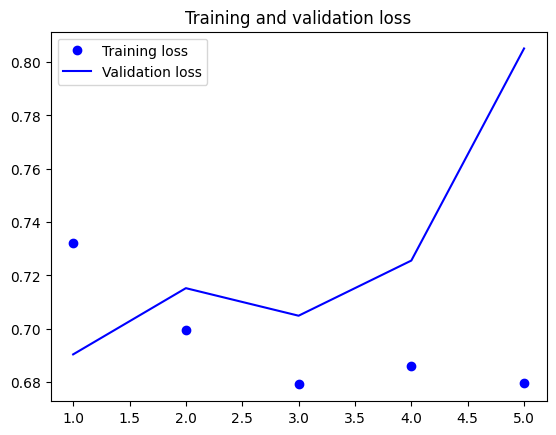

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Testing the Model**

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)


782/782 [==============================] - 4s 4ms/step - loss: 0.8031 - acc: 0.5000


[0.8030957579612732, 0.5]